# Create figures for Tazaki (submitted to MNRAS)


# Figure 3

## compute geometric cross sections

call geofractal.py to compute cross sections

In [1]:
import numpy as np
from geofractal import *
from otherformula import *

#-------------------------------------------------------
# Fractal dimension
#-------------------------------------------------------
df_chain = 1.0
df_bcca  = 1.9
df_bpca  = 3.0

#-------------------------------------------------------
# Fractal prefactor
#-------------------------------------------------------
k0_chain = np.sqrt(3.0)
k0_bcca  = 1.04
k0_bpca  = 0.3

#-------------------------------------------------------
# call geofractal.py
#-------------------------------------------------------
Nmin = 1.e0
Nmax = 1.e12
N    = 500
PN   = np.exp(np.linspace(math.log(Nmin),math.log(Nmax),N))

#
# Prepare arrays
# 
G_chain = np.zeros((N,3))
G_bcca = np.zeros((N,3))
G_bpca = np.zeros((N,3))
G_chain_exact = np.zeros(N)
G_M06_bcca = np.zeros(N)
G_M06_bpca = np.zeros(N)
error_chain = np.zeros((N,3))
error_bpca = np.zeros((N,3))
error_bcca = np.zeros((N,3))

for i in range(N):
    #
    # geofractal in FLDIM/EXPNL/GAUSS
    #
    G_chain[i,0] = geofractal(PN[i],df_chain,k0_chain,'FLDIM')
    G_bcca[i,0] = geofractal(PN[i],df_bcca,k0_bcca,'FLDIM')
    G_bpca[i,0] = geofractal(PN[i],df_bpca,k0_bpca,'FLDIM')
    G_chain[i,1] = geofractal(PN[i],df_chain,k0_chain,'EXPNL')
    G_bcca[i,1] = geofractal(PN[i],df_bcca,k0_bcca,'EXPNL')
    G_bpca[i,1] = geofractal(PN[i],df_bpca,k0_bpca,'EXPNL')
    G_chain[i,2] = geofractal(PN[i],df_chain,k0_chain,'GAUSS')
    G_bcca[i,2] = geofractal(PN[i],df_bcca,k0_bcca,'GAUSS')
    G_bpca[i,2] = geofractal(PN[i],df_bpca,k0_bpca,'GAUSS')
    #
    # call exact solution or Minato formula.
    #
    G_chain_exact[i] = chain_exact(PN[i])
    G_M06_bpca[i] = minato06_bpca(PN[i])
    G_M06_bcca[i] = minato06_bcca(PN[i])
    #
    # calculate relative error ( in [%] ) for each model
    #
    error_chain[i,0] = 1.e2*abs(G_chain[i,0]-G_chain_exact[i])/G_chain_exact[i]
    error_chain[i,1] = 1.e2*abs(G_chain[i,1]-G_chain_exact[i])/G_chain_exact[i]
    error_chain[i,2] = 1.e2*abs(G_chain[i,2]-G_chain_exact[i])/G_chain_exact[i]
    error_bpca[i,0] = 1.e2*abs(G_bpca[i,0]-G_M06_bpca[i])/G_M06_bpca[i]
    error_bpca[i,1] = 1.e2*abs(G_bpca[i,1]-G_M06_bpca[i])/G_M06_bpca[i]
    error_bpca[i,2] = 1.e2*abs(G_bpca[i,2]-G_M06_bpca[i])/G_M06_bpca[i]
    error_bcca[i,0] = 1.e2*abs(G_bcca[i,0]-G_M06_bcca[i])/G_M06_bcca[i]
    error_bcca[i,1] = 1.e2*abs(G_bcca[i,1]-G_M06_bcca[i])/G_M06_bcca[i]
    error_bcca[i,2] = 1.e2*abs(G_bcca[i,2]-G_M06_bcca[i])/G_M06_bcca[i]
    
#filename1='gratio_geofractal.out'
#filename2='gratio_previous.out'
#with open(filename1,'w') as f:
#    f.write('# df  = %13.6e \n'%df)
#    f.write('# k0  = %13.6e \n'%k0)
#    f.write('# model = %11s \n'%cormodel)
#    #f.write('# %11s %13s\n'%('N','G/NpiR0^2'))
#    f.write('# %11s %13s %13s %13s\n'%('N','Chain','BCCA','BPCA'))
#    for i in range(N):
#        f.write(%13.6e %13.6e %13.6e %13.6e\n'%(PN[i],G_chain[i],G_bcca[i],G_bpca[i]))
#print('# model = %11s'%cormodel)
#print('# %11s %13s %13s %13s'%('N','Chain','BCCA','BPCA'))


## make plot

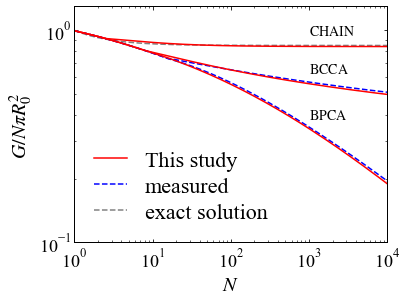

In [2]:
import matplotlib as mpl
from matplotlib import ticker, gridspec
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["figure.subplot.left"] = 0.17
plt.rcParams["figure.subplot.bottom"] = 0.16 
plt.rcParams["figure.subplot.right"] =0.96
plt.rcParams["figure.subplot.top"] = 0.98

f  = plt.figure(figsize=(5.5,4))
ax = plt.gca()

locmaj = ticker.LogLocator(base=10,numticks=10)   
locmin = ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)

ax.loglog(PN[:],G_chain_exact[:],color='grey',linestyle='--')
ax.loglog(PN[:],G_M06_bpca[:],color='b',linestyle='--')
ax.loglog(PN[:],G_M06_bcca[:],color='b',linestyle='--')
ax.loglog(PN[:],G_chain[:,0],color='r',linestyle='-')
ax.loglog(PN[:],G_bpca[:,0],color='r',linestyle='-')
ax.loglog(PN[:],G_bcca[:,0],color='r',linestyle='-')
ax.set_ylim(1.e-1,1.3)
ax.set_xlim(1.e0,1.e4)
# 
# Add fake legend
#
ax.loglog([0],[0],color='r',linestyle='-',label='This study')
ax.loglog([0],[0],color='b',linestyle='--',label='measured')
ax.loglog([0],[0],color='grey',linestyle='--',label='exact solution')
ax.legend(loc='best',fontsize=22,frameon=False)
ax.yaxis.set_major_locator(locmaj)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
ax.xaxis.set_major_locator(locmaj)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$G/N\pi R_0^2$')
ax.text(1.e3,0.95, r'$\mathrm{CHAIN}$', fontsize=14)
ax.text(1.e3,0.63, r'$\mathrm{BCCA}$', fontsize=14)
ax.text(1.e3,0.38, r'$\mathrm{BPCA}$', fontsize=14)
f.savefig('fig3.pdf')

# Figure B1a

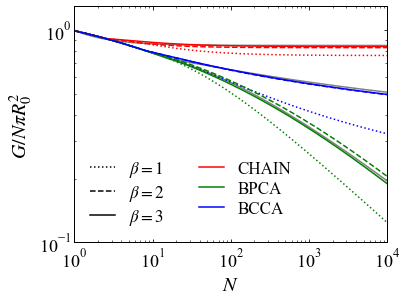

In [3]:
f  = plt.figure(figsize=(5.5,4))
ax = plt.gca()
locmaj = ticker.LogLocator(base=10,numticks=10)   
locmin = ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)

ax.loglog(PN[:],G_chain_exact[:],color='grey',linestyle='-')
ax.loglog(PN[:],G_M06_bpca[:],color='grey',linestyle='-')
ax.loglog(PN[:],G_M06_bcca[:],color='grey',linestyle='-')
ax.loglog(PN[:],G_chain[:,1],color='r',linestyle=':')
ax.loglog(PN[:],G_bpca[:,1],color='g',linestyle=':')
ax.loglog(PN[:],G_bcca[:,1],color='b',linestyle=':')
ax.loglog(PN[:],G_chain[:,2],color='r',linestyle='--')
ax.loglog(PN[:],G_bpca[:,2],color='g',linestyle='--')
ax.loglog(PN[:],G_bcca[:,2],color='b',linestyle='--')
ax.loglog(PN[:],G_chain[:,0],color='r',linestyle='-')
ax.loglog(PN[:],G_bpca[:,0],color='g',linestyle='-')
ax.loglog(PN[:],G_bcca[:,0],color='b',linestyle='-')
ax.set_ylim(1e-1,1.3)
ax.set_xlim(1.e0,1.e4)
# 
# Add fake legend
#
ax.loglog([0],[0],color='black',linestyle=':',label=r'$\beta=1$')
ax.loglog([0],[0],color='black',linestyle='--',label=r'$\beta=2$')
ax.loglog([0],[0],color='black',linestyle='-',label=r'$\beta=3$')
ax.loglog([0],[0],color='r',linestyle='-',label='CHAIN')
ax.loglog([0],[0],color='g',linestyle='-',label='BPCA')
ax.loglog([0],[0],color='b',linestyle='-',label='BCCA')

ax.legend(loc='best',fontsize=17,ncol=2,frameon=False)
ax.yaxis.set_major_locator(locmaj)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
ax.xaxis.set_major_locator(locmaj)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$G/N\pi R_0^2$')

f.savefig('fig7a.pdf')

## Figure B1b

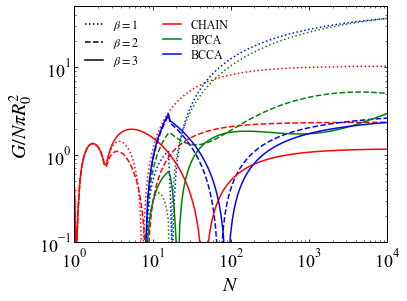

In [4]:
f  = plt.figure(figsize=(5.5,4))
ax = plt.gca()
locmaj = ticker.LogLocator(base=10,numticks=10)   
locmin = ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)

ax.loglog(PN[:],error_chain[:,1],color='r',linestyle=':')
ax.loglog(PN[:],error_bpca[:,1],color='g',linestyle=':')
ax.loglog(PN[:],error_bcca[:,1],color='b',linestyle=':')
ax.loglog(PN[:],error_chain[:,2],color='r',linestyle='--')
ax.loglog(PN[:],error_bpca[:,2],color='g',linestyle='--')
ax.loglog(PN[:],error_bcca[:,2],color='b',linestyle='--')
ax.loglog(PN[:],error_chain[:,0],color='r',linestyle='-')
ax.loglog(PN[:],error_bpca[:,0],color='g',linestyle='-')
ax.loglog(PN[:],error_bcca[:,0],color='b',linestyle='-')
ax.set_ylim(1e-1,5.e1)
ax.set_xlim(1.e0,1.e4)
# 
# Add fake legend
#
ax.loglog([0],[0],color='black',linestyle=':',label=r'$\beta=1$')
ax.loglog([0],[0],color='black',linestyle='--',label=r'$\beta=2$')
ax.loglog([0],[0],color='black',linestyle='-',label=r'$\beta=3$')
ax.loglog([0],[0],color='r',linestyle='-',label='CHAIN')
ax.loglog([0],[0],color='g',linestyle='-',label='BPCA')
ax.loglog([0],[0],color='b',linestyle='-',label='BCCA')

ax.legend(loc='upper left',fontsize=12,ncol=2,frameon=False)
ax.yaxis.set_major_locator(locmaj)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
ax.xaxis.set_major_locator(locmaj)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$G/N\pi R_0^2$')

f.savefig('fig7b.pdf')

## Figure 4

In [5]:
ndf = 20
df = np.linspace(1.0,3.0,ndf+1)
G = np.zeros((N,N))
GO = np.zeros((N,N))
GC = np.zeros((N,N))
for i in range(ndf+1):
    k0 = 0.5*(0.3-np.sqrt(3.0))*(df[i]-1.0)+np.sqrt(3.0)
    print (i,'%13.6e %13.6e'%(df[i],k0))
    for j in range(N):
            G[i,j] = geofractal(PN[j],df[i],k0,'FLDIM')
            GC[i,j] = chararea(PN[j],df[i],k0)
            GO[i,j] = okuzumi09(PN[j],df[i],k0)
#
# Compact grain
#
G_compact = np.zeros((N))
for i in range(N):
    G_compact[i] = PN[i]**(-1.0/3.0)
    

0  1.000000e+00  1.732051e+00
1  1.100000e+00  1.660448e+00
2  1.200000e+00  1.588846e+00
3  1.300000e+00  1.517243e+00
4  1.400000e+00  1.445641e+00
5  1.500000e+00  1.374038e+00
6  1.600000e+00  1.302436e+00
7  1.700000e+00  1.230833e+00
8  1.800000e+00  1.159230e+00
9  1.900000e+00  1.087628e+00
10  2.000000e+00  1.016025e+00
11  2.100000e+00  9.444229e-01
12  2.200000e+00  8.728203e-01
13  2.300000e+00  8.012178e-01
14  2.400000e+00  7.296152e-01
15  2.500000e+00  6.580127e-01
16  2.600000e+00  5.864102e-01
17  2.700000e+00  5.148076e-01
18  2.800000e+00  4.432051e-01
19  2.900000e+00  3.716025e-01
20  3.000000e+00  3.000000e-01


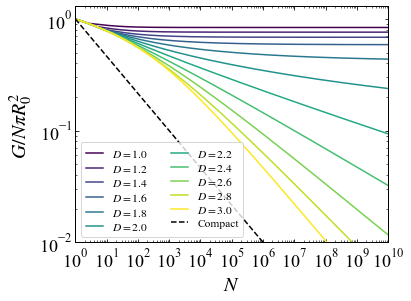

In [6]:
locmaj = ticker.LogLocator(base=10,numticks=25)   
locmin = ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 200)
f  = plt.figure(figsize=(5.5,4))
ax = plt.gca()
cmap = plt.get_cmap('viridis')
ax.set_ylim(1e-2,1.3)
ax.set_xlim(1.e0,1.e10)
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$G/N\pi R_0^2$')
ax.loglog(PN[:],G[0,:],color=cmap(0.0/10.0),linestyle='-',label=r'$D=1.0$')
ax.loglog(PN[:],G[2,:],color=cmap(1.0/10.0),linestyle='-',label=r'$D=1.2$')
ax.loglog(PN[:],G[4,:],color=cmap(2.0/10.0),linestyle='-',label=r'$D=1.4$')
ax.loglog(PN[:],G[6,:],color=cmap(3.0/10.0),linestyle='-',label=r'$D=1.6$')
ax.loglog(PN[:],G[8,:],color=cmap(4.0/10.0),linestyle='-',label=r'$D=1.8$')
ax.loglog(PN[:],G[10,:],color=cmap(5.0/10.0),linestyle='-',label=r'$D=2.0$')
ax.loglog(PN[:],G[12,:],color=cmap(6.0/10.0),linestyle='-',label=r'$D=2.2$')
ax.loglog(PN[:],G[14,:],color=cmap(7.0/10.0),linestyle='-',label=r'$D=2.4$')
ax.loglog(PN[:],G[16,:],color=cmap(8.0/10.0),linestyle='-',label=r'$D=2.6$')
ax.loglog(PN[:],G[18,:],color=cmap(9.0/10.0),linestyle='-',label=r'$D=2.8$')
ax.loglog(PN[:],G[20,:],color=cmap(10.0/10.0),linestyle='-',label=r'$D=3.0$')
ax.loglog(PN[:],G_compact[:],color='black',linestyle='--',label=r'Compact')
ax.xaxis.set_major_locator(locmaj)
ax.legend(loc='best',ncol=2,fontsize=11.5)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
f.savefig('fig4.pdf')

# Figure 5a

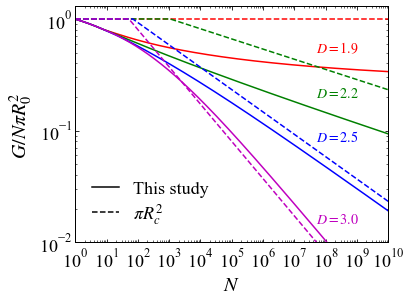

In [7]:
f  = plt.figure(figsize=(5.5,4))
ax = plt.gca()
cmap = plt.get_cmap('viridis')
ax.set_ylim(1e-2,1.3)
ax.set_xlim(1.e0,1.e10)
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$G/N\pi R_0^2$')
ax.loglog(PN[:],G[9,:],color='r',linestyle='-')
ax.loglog(PN[:],G[12,:],color='g',linestyle='-')
ax.loglog(PN[:],G[15,:],color='b',linestyle='-')
ax.loglog(PN[:],G[20,:],color='m',linestyle='-')
ax.loglog(PN[:],GC[9,:],color='r',linestyle='--')
ax.loglog(PN[:],GC[12,:],color='g',linestyle='--')
ax.loglog(PN[:],GC[15,:],color='b',linestyle='--')
ax.loglog(PN[:],GC[20,:],color='m',linestyle='--')

ax.text(5.e7,1.5e-2, r'$D=3.0$', color='m', fontsize=14)
ax.text(5.e7,8.0e-2, r'$D=2.5$', color='b', fontsize=14)
ax.text(5.e7,2.0e-1, r'$D=2.2$', color='g', fontsize=14)
ax.text(5.e7,5.0e-1, r'$D=1.9$', color='r', fontsize=14)
# 
# Add fake legend
#
ax.loglog([0],[0],color='black',linestyle='-',label=r'This study')
ax.loglog([0],[0],color='black',linestyle='--',label=r'$ \pi R_c^2$')

ax.xaxis.set_major_locator(locmaj)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.legend(loc='best',fontsize=18,frameon=False)
f.savefig('fig5a.pdf')

# Figure 5b

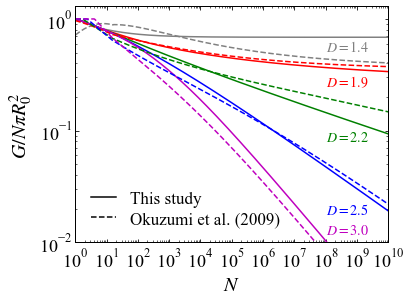

In [8]:
f  = plt.figure(figsize=(5.5,4))
ax = plt.gca()
cmap = plt.get_cmap('viridis')
ax.set_ylim(1e-2,1.3)
ax.set_xlim(1.e0,1.e10)
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$G/N\pi R_0^2$')
ax.loglog(PN[:],G[4,:],color='grey',linestyle='-')
ax.loglog(PN[:],G[9,:],color='r',linestyle='-')
ax.loglog(PN[:],G[12,:],color='g',linestyle='-')
ax.loglog(PN[:],G[15,:],color='b',linestyle='-')
ax.loglog(PN[:],G[20,:],color='m',linestyle='-')
ax.loglog(PN[:],GO[4,:],color='grey',linestyle='--')
ax.loglog(PN[:],GO[9,:],color='r',linestyle='--')
ax.loglog(PN[:],GO[12,:],color='g',linestyle='--')
ax.loglog(PN[:],GO[15,:],color='b',linestyle='--')
ax.loglog(PN[:],GO[20,:],color='m',linestyle='--')
# 
# Add fake legend
#
ax.loglog([0],[0],color='black',linestyle='-',label=r'This study')
ax.loglog([0],[0],color='black',linestyle='--',label=r'Okuzumi et al. (2009)')

ax.text(1.e8,1.2e-2, r'$D=3.0$', color='m', fontsize=14)
ax.text(1.e8,1.8e-2, r'$D=2.5$', color='b', fontsize=14)
ax.text(1.e8,8.0e-2, r'$D=2.2$', color='g', fontsize=14)
ax.text(1.e8,2.5e-1, r'$D=1.9$', color='r', fontsize=14)
ax.text(1.e8,5.2e-1, r'$D=1.4$', color='grey', fontsize=14)

ax.xaxis.set_major_locator(locmaj)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.legend(loc='best',fontsize=17,frameon=False)

f.savefig('fig5b.pdf')

In [9]:
ndf = 100
df = np.linspace(1.0,3.0,ndf+1)
logPN = np.zeros((N))
G = np.zeros((ndf+1,N))
GO = np.zeros((ndf+1,N))
error = np.zeros((ndf+1,N))

for i in range(N):
    logPN[i] = math.log10(PN[i])

for i in range(ndf+1):
    k0 = 0.5*(0.3-np.sqrt(3.0))*(df[i]-1.0)+np.sqrt(3.0)
    print (i,'%13.6e %13.6e'%(df[i],k0))
    for j in range(N):
            G[i,j] = geofractal(PN[j],df[i],k0,'FLDIM')
            GO[i,j] = okuzumi09(PN[j],df[i],k0)
            error[i,j] = (GO[i,j]-G[i,j])*1.e2/G[i,j]

0  1.000000e+00  1.732051e+00
1  1.020000e+00  1.717730e+00
2  1.040000e+00  1.703410e+00
3  1.060000e+00  1.689089e+00
4  1.080000e+00  1.674769e+00
5  1.100000e+00  1.660448e+00
6  1.120000e+00  1.646128e+00
7  1.140000e+00  1.631807e+00
8  1.160000e+00  1.617487e+00
9  1.180000e+00  1.603166e+00
10  1.200000e+00  1.588846e+00
11  1.220000e+00  1.574525e+00
12  1.240000e+00  1.560205e+00
13  1.260000e+00  1.545884e+00
14  1.280000e+00  1.531564e+00
15  1.300000e+00  1.517243e+00
16  1.320000e+00  1.502923e+00
17  1.340000e+00  1.488602e+00
18  1.360000e+00  1.474282e+00
19  1.380000e+00  1.459961e+00
20  1.400000e+00  1.445641e+00
21  1.420000e+00  1.431320e+00
22  1.440000e+00  1.417000e+00
23  1.460000e+00  1.402679e+00
24  1.480000e+00  1.388359e+00
25  1.500000e+00  1.374038e+00
26  1.520000e+00  1.359718e+00
27  1.540000e+00  1.345397e+00
28  1.560000e+00  1.331077e+00
29  1.580000e+00  1.316756e+00
30  1.600000e+00  1.302436e+00
31  1.620000e+00  1.288115e+00
32  1.640000e+00  

# Figure 6

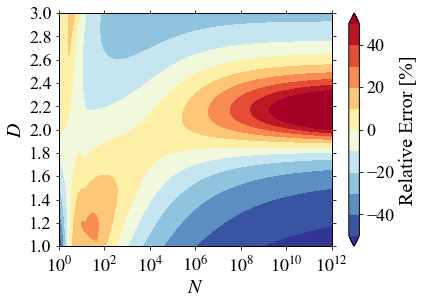

In [11]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

@plt.FuncFormatter
def fake_log(x, pos):
    'The two args are the value and tick position'
    return r'$10^{%d}$' % (x)

plt.rcParams['xtick.direction'] = 'out' # x axis in
plt.rcParams['ytick.direction'] = 'out' # y axis in 
plt.rcParams["figure.subplot.top"] = 0.97

fig, ax2 = plt.subplots()
ax2.set_xlim(0,12)
ax2.set_ylim(1,3)
cs=ax2.contourf(logPN,df,error,levels=[-50,-40,-30,-20,-10,0,10,20,30,40,50],extent=(0,12,1,3), extend="both", cmap='RdYlBu_r')
ax2.set_ylabel(r'$D$')
ax2.set_xlabel(r'$N$')
ax2.xaxis.set_major_locator(ticker.MaxNLocator(6))
ax2.xaxis.set_major_formatter(fake_log)
ax2.yaxis.set_major_locator(MultipleLocator(0.2))
cbar=fig.colorbar(cs)
cbar.set_label(r'Relative Error [%]')
plt.savefig('fig6.pdf')